In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
# Value counts for each feature data
for i in df.columns:
    print(df[i].value_counts())
    print("no of unique values",df[i].nunique())
    print('*****************')

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
no of unique values 614
*****************
Male      489
Female    112
Name: Gender, dtype: int64
no of unique values 2
*****************
Yes    398
No     213
Name: Married, dtype: int64
no of unique values 2
*****************
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
no of unique values 4
*****************
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
no of unique values 2
*****************
No     500
Yes     82
Name: Self_Employed, dtype: int64
no of unique values 2
*****************
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
no of unique values 505
*****************
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250

## Checking for null values

In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
#Removing null values
df.dropna(inplace=True)

In [7]:
df.duplicated().sum()

0

# EDA

<AxesSubplot:xlabel='Gender', ylabel='count'>

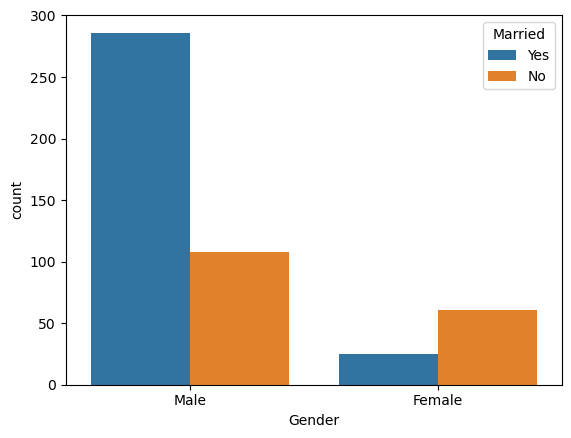

In [12]:
sns.countplot(x='Gender',data=df,hue="Married")

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

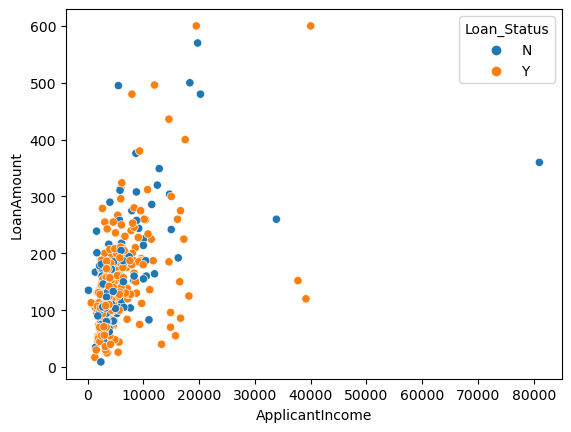

In [13]:
sns.scatterplot(data=df,x="ApplicantIncome", y="LoanAmount", hue= "Loan_Status" )

## Preparing the data

## converting categorical to numerical

In [18]:
df.nunique()

Loan_ID              480
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      405
CoapplicantIncome    232
LoanAmount           186
Loan_Amount_Term       9
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [19]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
df['Dependents']=le.fit_transform(df['Dependents'])
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Credit_History']=le.fit_transform(df['Credit_History'])
df['Property_Area']=le.fit_transform(df['Property_Area'])

In [20]:
# dropping column loan ID as it has no contribution in preccitions.
df1=df.drop("Loan_ID", axis=1)

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int32  
 1   Married            480 non-null    int32  
 2   Dependents         480 non-null    int32  
 3   Education          480 non-null    int32  
 4   Self_Employed      480 non-null    int32  
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    int64  
 10  Property_Area      480 non-null    int32  
 11  Loan_Status        480 non-null    object 
dtypes: float64(3), int32(6), int64(2), object(1)
memory usage: 37.5+ KB


## Skewness Handling

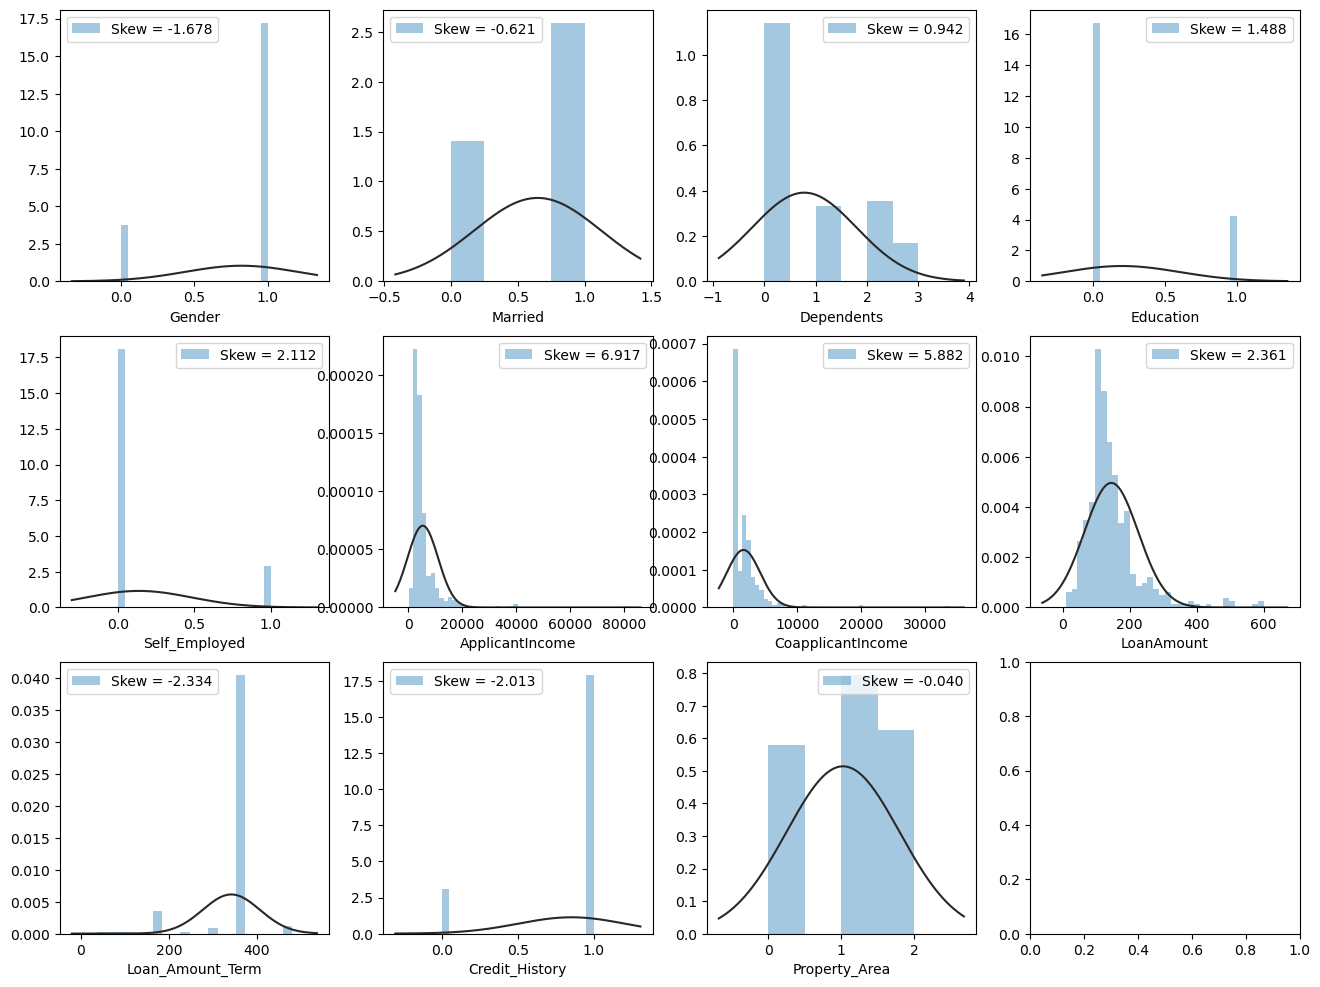

In [24]:
fig,ax = plt.subplots(3,4, figsize=(16, 12))
ax = ax.flatten()
i = 0
for col in df1.drop("Loan_Status", axis=1).columns:
    skew = df1.drop("Loan_Status", axis=1)[col].skew()
    sns.distplot(df1.drop("Loan_Status", axis=1)[col], ax = ax[i], fit= stats.norm, kde=False, label='Skew = %.3f' %(skew))
    ax[i].legend(loc='best')
    i += 1
plt.show()

In [25]:
df1.skew()

Gender              -1.678471
Married             -0.621334
Dependents           0.942272
Education            1.488474
Self_Employed        2.111872
ApplicantIncome      6.917027
CoapplicantIncome    5.881622
LoanAmount           2.361437
Loan_Amount_Term    -2.333710
Credit_History      -2.013253
Property_Area       -0.039673
dtype: float64

In [30]:
from sklearn.preprocessing import power_transform

df1[['LoanAmount','Loan_Amount_Term','CoapplicantIncome','ApplicantIncome','Education']]=power_transform(df1[['LoanAmount','Loan_Amount_Term','CoapplicantIncome','ApplicantIncome','Education']],method='yeo-johnson')

In [31]:
df1.skew()

Gender              -1.678471
Married             -0.621334
Dependents           0.942272
Education            1.488474
Self_Employed        2.111872
ApplicantIncome     -0.330906
CoapplicantIncome   -0.093751
LoanAmount          -0.045601
Loan_Amount_Term     0.487597
Credit_History      -2.013253
Property_Area       -0.039673
dtype: float64

## Outliers handling

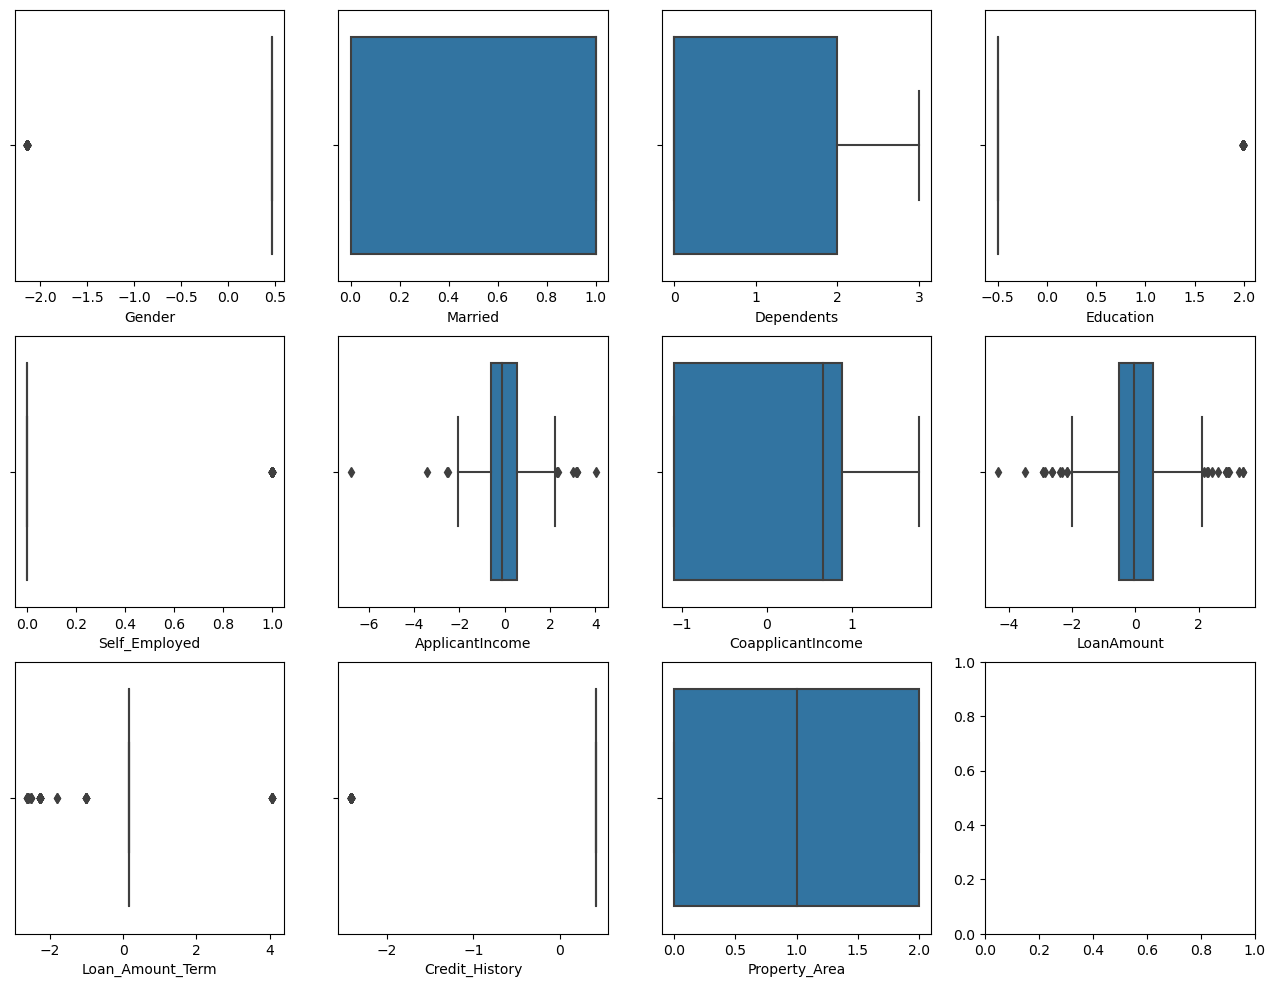

In [34]:
fig,ax = plt.subplots(3,4, figsize=(16, 12))
ax = ax.flatten()
i = 0
for col in df1.drop("Loan_Status",axis=1).columns:
    skew = df1.drop("Loan_Status",axis=1)[col].skew()
    sns.boxplot(df[col], ax = ax[i])  
    i += 1
plt.show()

In [35]:
z=np.abs(zscore(df1.drop("Loan_Status",axis=1)))
dfn=df1[(z<3).all(axis=1)]
dfn

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0.467198,1,1,-0.503253,0,0.178700,0.733378,-0.020144,0.170967,0.413197,0,N
2,0.467198,1,0,-0.503253,1,-0.529336,-1.085144,-1.288720,0.170967,0.413197,2,Y
3,0.467198,1,0,1.987072,0,-0.793094,0.897635,-0.147769,0.170967,0.413197,2,Y
4,0.467198,0,0,-0.503253,0,0.599727,-1.085144,0.172545,0.170967,0.413197,2,Y
5,0.467198,1,2,-0.503253,1,0.442415,1.120295,1.493529,0.170967,0.413197,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,-2.140419,0,0,-0.503253,0,-0.588467,-1.085144,-1.153632,0.170967,0.413197,0,Y
610,0.467198,1,3,-0.503253,0,0.000671,-1.085144,-2.181050,-2.260943,0.413197,0,Y
611,0.467198,1,1,-0.503253,0,1.040809,0.133166,1.378480,0.170967,0.413197,2,Y
612,0.467198,1,2,-0.503253,0,0.949715,-1.085144,0.745539,0.170967,0.413197,2,Y


In [36]:
-f1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0.467198,1,1,-0.503253,0,0.178700,0.733378,-0.020144,0.170967,0.413197,0,N
2,0.467198,1,0,-0.503253,1,-0.529336,-1.085144,-1.288720,0.170967,0.413197,2,Y
3,0.467198,1,0,1.987072,0,-0.793094,0.897635,-0.147769,0.170967,0.413197,2,Y
4,0.467198,0,0,-0.503253,0,0.599727,-1.085144,0.172545,0.170967,0.413197,2,Y
5,0.467198,1,2,-0.503253,1,0.442415,1.120295,1.493529,0.170967,0.413197,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,-2.140419,0,0,-0.503253,0,-0.588467,-1.085144,-1.153632,0.170967,0.413197,0,Y
610,0.467198,1,3,-0.503253,0,0.000671,-1.085144,-2.181050,-2.260943,0.413197,0,Y
611,0.467198,1,1,-0.503253,0,1.040809,0.133166,1.378480,0.170967,0.413197,2,Y
612,0.467198,1,2,-0.503253,0,0.949715,-1.085144,0.745539,0.170967,0.413197,2,Y


480-459=21, only 5% data has been removed in the outlier treatment

In [53]:
df1["Loan_Status"].value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

In [54]:
#Applying SMOTE

from imblearn.over_sampling import SMOTE
smt=SMOTE()
train_x,train_y=smt.fit_resample(dfn.iloc[:,:-1],dfn.iloc[:,-1])

## Scaling of Independent features

In [78]:
X=dfn.iloc[:,:-1]
y=dfn.iloc[:,-1]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

In [79]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    rfc.fit(x_train,y_train)
   
    rfc_predict_test=rfc.predict(x_test)
    print(f'At random state {i}, The training accuracy is :-{accuracy_score(y_test,rfc_predict_test)}')
    
    print('\n')

At random state 0, The training accuracy is :-0.8043478260869565


At random state 1, The training accuracy is :-0.8586956521739131


At random state 2, The training accuracy is :-0.8043478260869565


At random state 3, The training accuracy is :-0.8586956521739131


At random state 4, The training accuracy is :-0.782608695652174


At random state 5, The training accuracy is :-0.8260869565217391


At random state 6, The training accuracy is :-0.8586956521739131


At random state 7, The training accuracy is :-0.8043478260869565


At random state 8, The training accuracy is :-0.8260869565217391


At random state 9, The training accuracy is :-0.8260869565217391


At random state 10, The training accuracy is :-0.7608695652173914


At random state 11, The training accuracy is :-0.8043478260869565


At random state 12, The training accuracy is :-0.782608695652174


At random state 13, The training accuracy is :-0.8478260869565217


At random state 14, The training accuracy is :-0.82608695652

At random state 82, The training accuracy is :-0.9130434782608695


In [86]:
# Split 80-20 train vs test data
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=82)

In [87]:
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(367, 11) (367,)
(92, 11) (92,)


In [88]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

accuracy score for  LogisticRegression() is :  0.9130434782608695 
 [[10  8]
 [ 0 74]] 
               precision    recall  f1-score   support

           N       1.00      0.56      0.71        18
           Y       0.90      1.00      0.95        74

    accuracy                           0.91        92
   macro avg       0.95      0.78      0.83        92
weighted avg       0.92      0.91      0.90        92
 

Cross Validation Score is : [0.72972973 0.81081081 0.80821918 0.80821918 0.78082192]
Mean Score : 0.7875601629026286


accuracy score for  GaussianNB() is :  0.8913043478260869 
 [[10  8]
 [ 2 72]] 
               precision    recall  f1-score   support

           N       0.83      0.56      0.67        18
           Y       0.90      0.97      0.94        74

    accuracy                           0.89        92
   macro avg       0.87      0.76      0.80        92
weighted avg       0.89      0.89      0.88        92
 

Cross Validation Score is : [0.72972973 0.71621622 0.

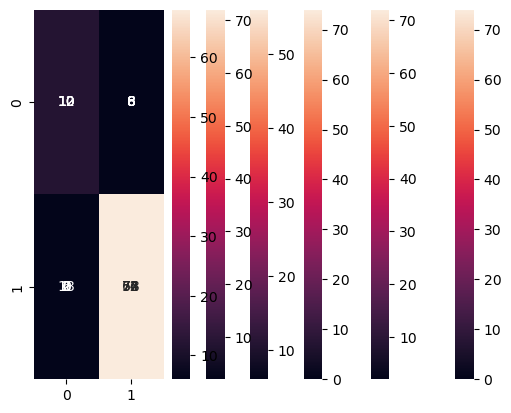

In [89]:
model=[lg,gnb,svc,dtc,knn,rfc]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print("accuracy score for ",m,"is : ",accuracy_score(test_y,predm),"\n",confusion_matrix(test_y,predm),"\n",classification_report(test_y,predm),"\n")
    sns.heatmap(confusion_matrix(test_y,predm),annot=True)
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("==============================================\n\n\n====================================================")

accuracy score for  SVC() is :  0.9130434782608695 

In [90]:
dict2={"kernel":['linear', 'poly', 'rbf',],"shrinking":[True, False,],"gamma":['scale', 'auto']}
gv=GridSearchCV(svc,dict2, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'gamma': 'scale', 'kernel': 'rbf', 'shrinking': True}

In [92]:
svc_f=SVC(kernel='rbf', shrinking=True , gamma= 'scale')
svc_f.fit(train_x,train_y)
prf=svc_f.predict(test_x)
print(accuracy_score(test_y,prf))
score=cross_val_score(svc_f,train_x,train_y,cv=4)
print("Cross Validation Score is :",score)
print("Mean Score :",score.mean())

0.9130434782608695
Cross Validation Score is : [0.7173913  0.86956522 0.82608696 0.76923077]
Mean Score : 0.7955685618729097


In [94]:
import joblib
joblib.dump(rf1,"loan_svc.obj")

['loan_svc.obj']

In [95]:
svc_l=joblib.load('loan_svc.obj')

In [97]:
result=svc_l.predict(test_x)

In [98]:
print(accuracy_score(test_y,result))

0.9891304347826086
